# Bioviersity of National Parks 

## Objectives

Discover if there is or not any pattern or theme on species to become endangered

## Data inspection, cleaning and tidying

In [43]:
#libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
obs=pd.read_csv("observations.csv")
speInfo=pd.read_csv("species_info.csv")
print(obs.head())
print(obs.info())
print(len(obs.scientific_name.unique()))
parks=obs.park_name.unique()
print(parks)
obs=obs.rename(columns={'scientific_name':'scname'})

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None
5541
['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [45]:
speInfo=speInfo.rename(columns={'scientific_name':'scname','conservation_status':'status'})
print(speInfo.head())
print(speInfo.info())


  category                         scname  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names status  
0                           Gapper's Red-Backed Vole    NaN  
1                              American Bison, Bison    NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...    NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)    NaN  
4                                      Wapiti Or Elk    NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   category      5824 non-null   object
 1   scname        5824 non-null   object
 2   common_names  5824 non-null   object
 3   status        191 non-null    object

In [65]:
status_use=speInfo['status'].unique() #missing values of status considered as not in danger
speInfo=speInfo.sort_values('scname')
print(status_use)
print(speInfo.head(15))
print(len(speInfo))
speInfo=speInfo.drop_duplicates(subset='scname')
print(len(speInfo))


[nan 'Species of Concern' 'Threatened' 'Endangered' 'In Recovery']
               category                scname  \
4061     Vascular Plant         Abies bifolia   
5443     Vascular Plant        Abies concolor   
1928     Vascular Plant         Abies fraseri   
2908  Nonvascular Plant  Abietinella abietina   
3736     Vascular Plant     Abronia ammophila   
1866     Vascular Plant  Abutilon theophrasti   
1768     Vascular Plant    Acalypha gracilens   
1769     Vascular Plant  Acalypha ostryifolia   
1770     Vascular Plant   Acalypha rhomboidea   
1771     Vascular Plant    Acalypha virginica   
3176               Bird      Acanthus flammea   
91                 Bird    Accipiter cooperii   
92                 Bird    Accipiter gentilis   
93                 Bird    Accipiter striatus   
4403     Vascular Plant          Acer glabrum   

                                           common_names              status  
4061                          Rocky Mountain Alpine Fir               

## Hipotesis
1. The status of a spice is influence by the park that animal lives
2. The category of the animal influence in the status

#### The status of a spice is influence by the park that animal lives

                                       scname  \
24                           Zizia trifoliata   
36           Camissonia sierrae ssp. alticola   
71                           Tofieldia glabra   
94                         Accipiter cooperii   
118  Dichanthelium acuminatum var. acuminatum   

                               park_name        category              status  
24                Yosemite National Park  Vascular Plant  Species of Concern  
36                   Bryce National Park  Vascular Plant  Species of Concern  
71   Great Smoky Mountains National Park  Vascular Plant  Species of Concern  
94                   Bryce National Park            Bird  Species of Concern  
118               Yosemite National Park  Vascular Plant  Species of Concern  
760



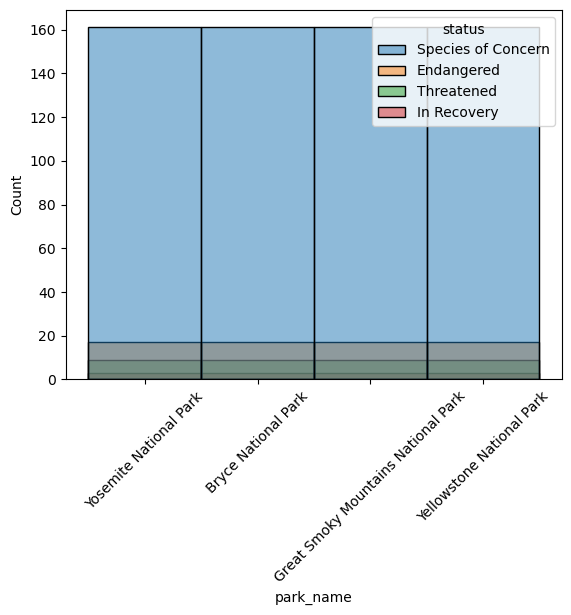

In [79]:

hip1=obs[['scname','park_name']]
hip1 = hip1.merge(speInfo[['category','scname','status']],on='scname',how='left',validate='many_to_one')
hip1= hip1.dropna(subset=['status'])       
print(hip1.head())
print(len(hip1))
con=hip1[hip1.status=='Threatened']
sns.histplot(hip1,x='park_name',hue='status')
ax=plt.subplot()
ax.tick_params(axis='x',labelrotation=45)
print()


all parks have the same number of endangered species

<Axes: xlabel='status', ylabel='Count'>

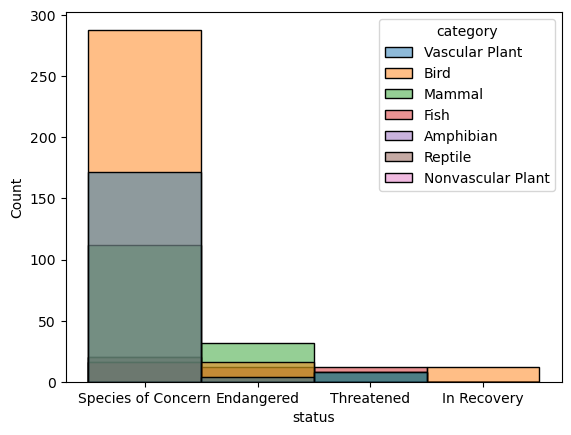